# System

## Import Data

In [16]:
import pandas as pd
vg_sales = "https://docs.google.com/spreadsheets/d/1JKaHWAn6lEv0XZfQgdnFoG_laVDz466-/export?format=csv"
df = pd.read_csv(vg_sales)

In [17]:
#kiểm tra
df.head()

,Rank,Name,Platform,Manufacturer,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Total_platform_NA_Sales,Total_platform_EU_Sales,Total_platform_JP_Sales,Total_platform_Other_Sales,Total_platform_Global_Sales
0,1,Wii Sports,Wii,Nintendo,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,Nintendo,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,32.48,4.88,6.96,0.99,45.31
2,3,Mario Kart Wii,Wii,Nintendo,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,Nintendo,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,Nintendo,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,11.27,8.89,10.22,1.00,31.37


## Chuyển JP Sale to float64

In [18]:
df['Total_platform_JP_Sales']= df['Total_platform_JP_Sales'].astype('float64')
df.head(5)

,Rank,Name,Platform,Manufacturer,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Total_platform_NA_Sales,Total_platform_EU_Sales,Total_platform_JP_Sales,Total_platform_Other_Sales,Total_platform_Global_Sales
0,1,Wii Sports,Wii,Nintendo,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,Nintendo,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,32.48,4.88,6.96,0.99,45.31
2,3,Mario Kart Wii,Wii,Nintendo,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,Nintendo,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,Nintendo,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,11.27,8.89,10.22,1.00,31.37


## Chuyển toàn bộ object thành string

In [19]:
object_columns = df.select_dtypes(include='object').columns  # Identify object columns
df[object_columns] = df[object_columns].astype('string')

In [20]:
df.dtypes

,0
Rank,int64
Name,string[python]
Platform,string[python]
Manufacturer,string[python]
Year,int64
Genre,string[python]
Publisher,string[python]
NA_Sales,float64
EU_Sales,float64
JP_Sales,float64


## Kiểm tra null và tiếp tục xử lý

In [22]:
df.isnull().sum()

,0
Rank,0
Name,0
Platform,0
Manufacturer,0
Year,0
Genre,0
Publisher,58
NA_Sales,0
EU_Sales,0
JP_Sales,0


# Phân tích cơ bản

## Tổng quan doanh số

In [23]:
print(df[['NA_Sales', 'JP_Sales', 'EU_Sales', 'Other_Sales', 'Global_Sales']].describe())

           NA_Sales      JP_Sales      EU_Sales   Other_Sales  Global_Sales
count  16598.000000  16598.000000  16598.000000  16598.000000  16598.000000
mean       0.264667      0.077782      0.146652      0.048063      0.537441
std        0.816683      0.309291      0.505351      0.188588      1.555028
min        0.000000      0.000000      0.000000      0.000000      0.010000
25%        0.000000      0.000000      0.000000      0.000000      0.060000
50%        0.080000      0.000000      0.020000      0.010000      0.170000
75%        0.240000      0.040000      0.110000      0.040000      0.470000
max       41.490000     10.220000     29.020000     10.570000     82.740000


## Phân phối doanh số

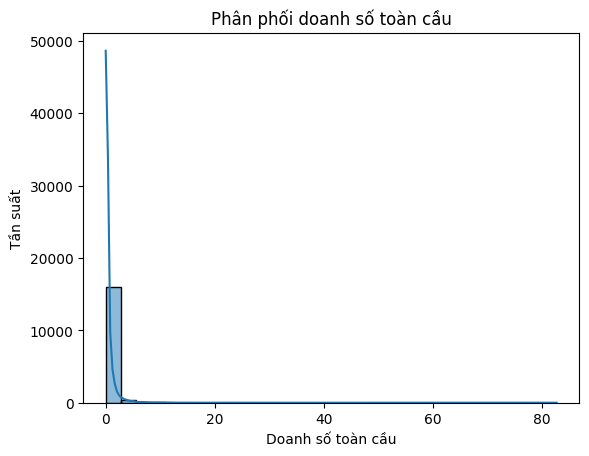

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Phân phối doanh số toàn cầu
sns.histplot(df['Global_Sales'], bins=30, kde=True)
plt.title('Phân phối doanh số toàn cầu')
plt.xlabel('Doanh số toàn cầu')
plt.ylabel('Tần suất')
plt.show()

Tử bảng phân phối này cho thấy phần lới các game co doanh số cao rất thấp đa phần các game đều có doanh số thấp.

## Tương quan giữa các biến

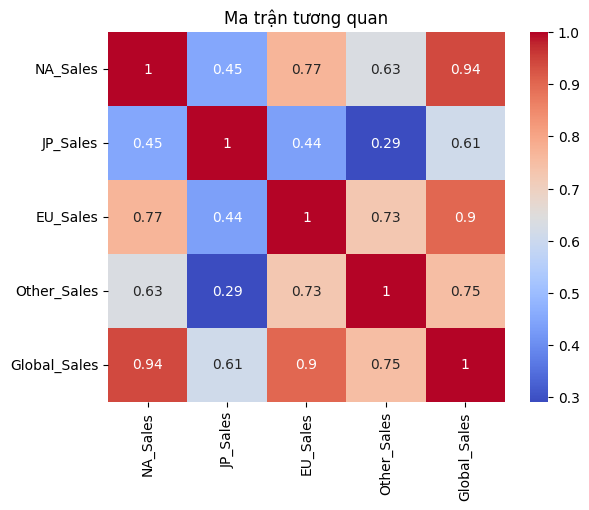

In [30]:
# Ma trận tương quan
corr_matrix = df[['NA_Sales', 'JP_Sales', 'EU_Sales', 'Other_Sales', 'Global_Sales']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Ma trận tương quan')
plt.show()

	•	Bắc Mỹ (NA) và châu Âu (EU) là hai thị trường có tác động lớn nhất đến tổng doanh số.
	•	Nhật Bản (JP) có xu hướng riêng, không đồng nhất với các khu vực khác.

➡ Chiến lược đầu tư:
✅ Nếu muốn game có doanh số cao, hãy tập trung vào thị trường Bắc Mỹ và châu Âu.
✅ Nếu nhắm đến Nhật Bản, cần có chiến lược riêng biệt vì xu hướng tiêu dùng khác biệt.

# Phân tích theo các yếu tố

## Doanh số theo từng nhà sản xuất nền tảng

In [25]:
platform_sales = df.groupby('Manufacturer')['Global_Sales'].sum().sort_values(ascending=False)
print(platform_sales)

Manufacturer
Sony         3580.45
Nintendo     3521.83
Microsoft    1379.28
PC            258.82
Atari          97.08
Sega           79.83
SNK             1.44
Bandai          1.42
NEC             0.19
Panasonic       0.10
Name: Global_Sales, dtype: float64


## Doanh số theo từng thể loại game

In [15]:
platform_sales = df.groupby('Genre')['Global_Sales'].sum().sort_values(ascending=False)
print(platform_sales)

Genre
Action          1751.18
Sports          1330.93
Shooter         1037.37
Role-Playing     927.37
Platform         831.37
Misc             809.96
Racing           732.04
Fighting         448.91
Simulation       392.20
Puzzle           244.95
Adventure        239.04
Strategy         175.12
Name: Global_Sales, dtype: float64


# Phân tích theo từng khu vực

## NA

### Doanh số theo thể loại

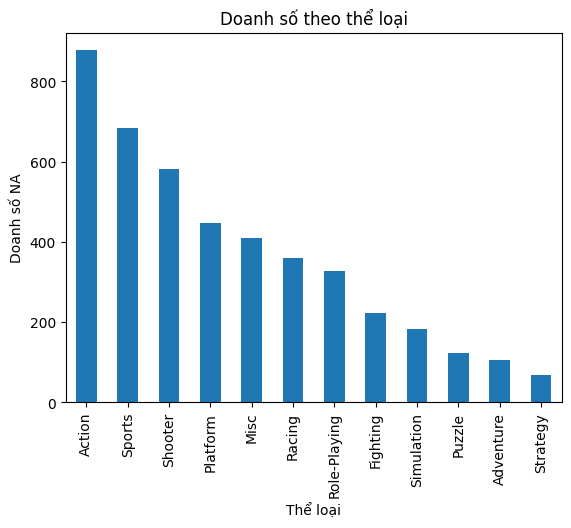

In [64]:
# Doanh số theo thể loại
genre_sales = df.groupby('Genre')['NA_Sales'].sum().sort_values(ascending=False)
genre_sales.plot(kind='bar', title='Doanh số theo thể loại')
plt.xlabel('Thể loại')
plt.ylabel('Doanh số NA')
plt.show()

### Doanh số theo nhà phát hành

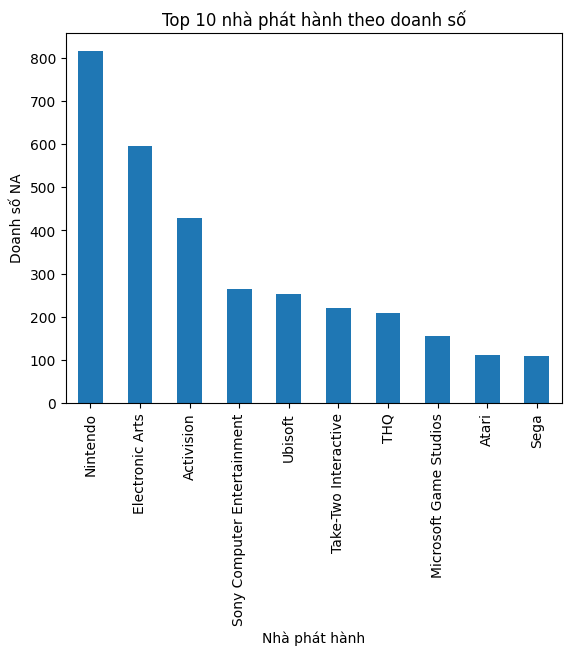

In [65]:
# Top 10 nhà phát hành có doanh số cao nhất
publisher_sales = df.groupby('Publisher')['NA_Sales'].sum().sort_values(ascending=False).head(10)
publisher_sales.plot(kind='bar', title='Top 10 nhà phát hành theo doanh số')
plt.xlabel('Nhà phát hành')
plt.ylabel('Doanh số NA')
plt.show()

### Doanh số theo nhà sản xuất platform

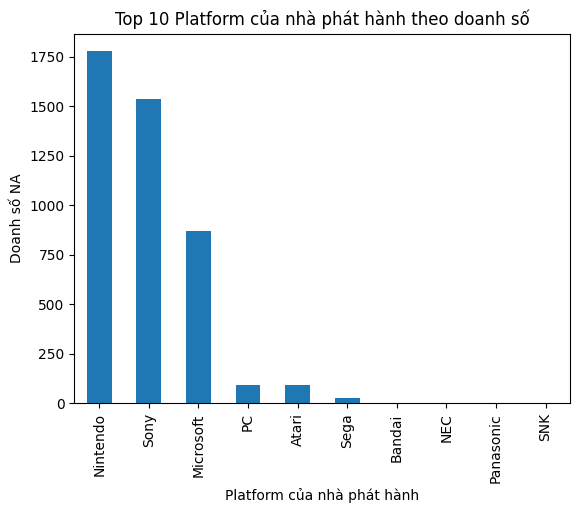

In [66]:
# Top 10 nhà phát hành có doanh số cao nhất
publisher_sales = df.groupby('Manufacturer')['NA_Sales'].sum().sort_values(ascending=False).head(10)
publisher_sales.plot(kind='bar', title='Top 10 Platform của nhà phát hành theo doanh số')
plt.xlabel('Platform của nhà phát hành')
plt.ylabel('Doanh số NA')
plt.show()

Dựa vào top 3 của thể loại, nhà phát hành và platform cho thấy
- Thị trường NA là thích các tựa game thuộc thể loại Action, Sport và Shooter
- Các nhà phát hành nổi trội gồm Nintendo, EA và Activision
- Platform thuộc các nhà sản xuất Nintendo, Sony và Microsoft được chú ý nhiều
-> Với thị trường bắc mỹ nên tập trung đầu từ vào game thuộc thể loại Action và Sport cho 2 dòng mày của Nintendo và Sony

## EU

### Doanh số theo thể loại

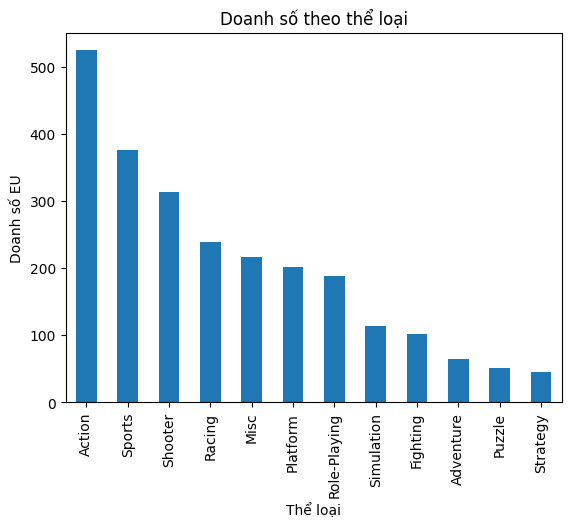

In [61]:
# Doanh số theo thể loại
genre_sales = df.groupby('Genre')['EU_Sales'].sum().sort_values(ascending=False)
genre_sales.plot(kind='bar', title='Doanh số theo thể loại')
plt.xlabel('Thể loại')
plt.ylabel('Doanh số EU')
plt.show()

### Doanh số theo nhà phát hành

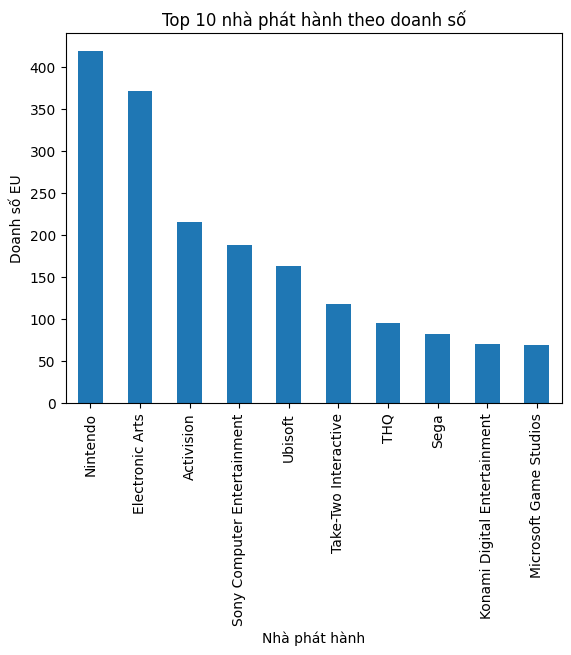

In [62]:
# Top 10 nhà phát hành có doanh số cao nhất
publisher_sales = df.groupby('Publisher')['EU_Sales'].sum().sort_values(ascending=False).head(10)
publisher_sales.plot(kind='bar', title='Top 10 nhà phát hành theo doanh số')
plt.xlabel('Nhà phát hành')
plt.ylabel('Doanh số EU')
plt.show()

### Doanh số theo nhà sản xuất platform

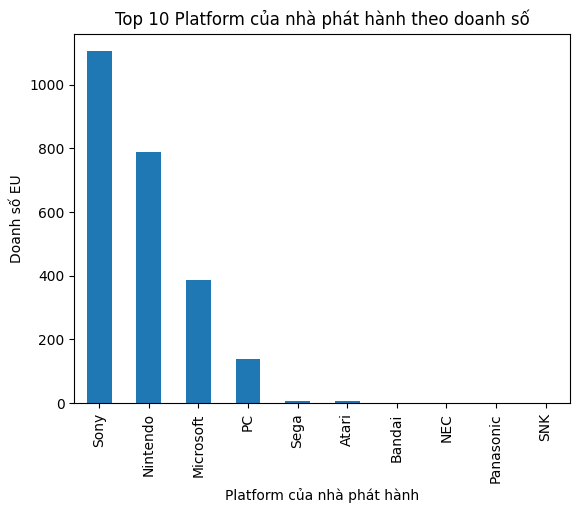

In [63]:
# Top 10 nhà phát hành có doanh số cao nhất
publisher_sales = df.groupby('Manufacturer')['EU_Sales'].sum().sort_values(ascending=False).head(10)
publisher_sales.plot(kind='bar', title='Top 10 Platform của nhà phát hành theo doanh số')
plt.xlabel('Platform của nhà phát hành')
plt.ylabel('Doanh số EU')
plt.show()

Dựa vào top 3 của thể loại, nhà phát hành và platform cho thấy
- Thị trường EU là thích các tựa game thuộc thể loại Action, Sport và Shooter
- Các nhà phát hành nổi trội gồm Nintendo, EA và Activision
- Platform thuộc các nhà sản xuất Nintendo, Sony và Microsoft được chú ý nhiều
-> Với thị trường EU  nên tập trung đầu từ vào game thuộc thể loại Action và Sport cho 2 dòng mày của Nintendo và Sony


## Other

### Doanh số theo thể loại

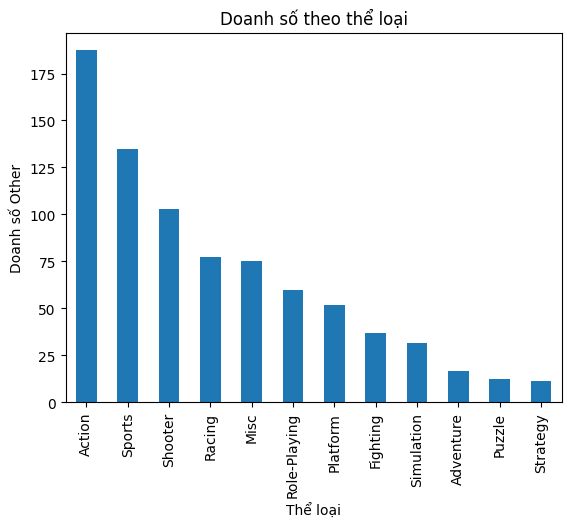

In [67]:
# Doanh số theo thể loại
genre_sales = df.groupby('Genre')['Other_Sales'].sum().sort_values(ascending=False)
genre_sales.plot(kind='bar', title='Doanh số theo thể loại')
plt.xlabel('Thể loại')
plt.ylabel('Doanh số Other')
plt.show()

### Doanh số theo nhà phát hành

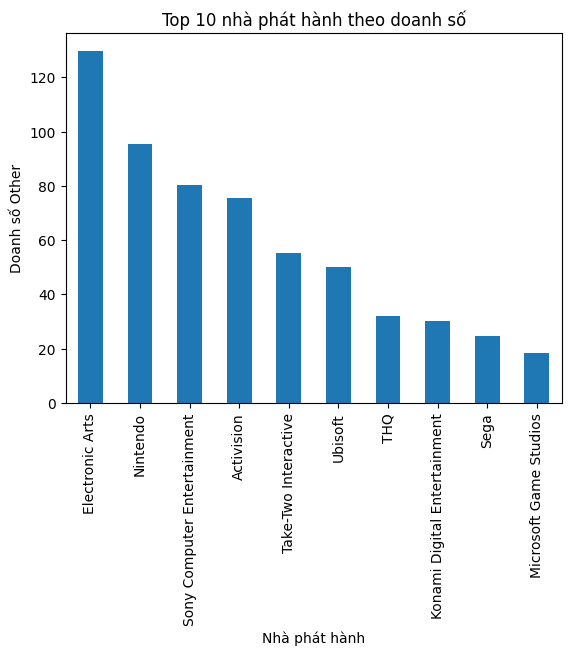

In [68]:
# Top 10 nhà phát hành có doanh số cao nhất
publisher_sales = df.groupby('Publisher')['Other_Sales'].sum().sort_values(ascending=False).head(10)
publisher_sales.plot(kind='bar', title='Top 10 nhà phát hành theo doanh số')
plt.xlabel('Nhà phát hành')
plt.ylabel('Doanh số Other')
plt.show()

### Doanh số theo nhà sản xuất platform

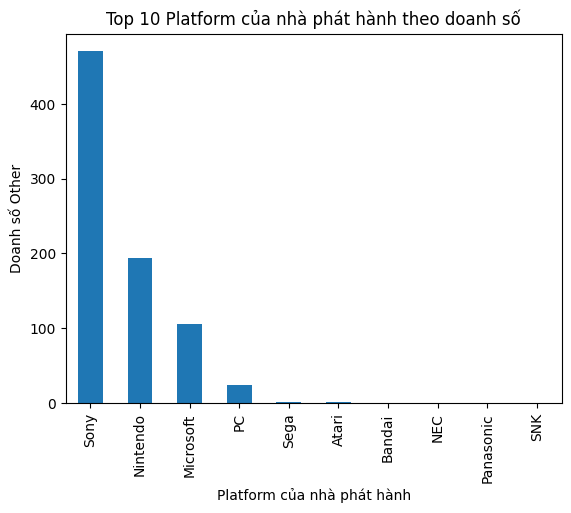

In [60]:
# Top 10 nhà phát hành có doanh số cao nhất
publisher_sales = df.groupby('Manufacturer')['Other_Sales'].sum().sort_values(ascending=False).head(10)
publisher_sales.plot(kind='bar', title='Top 10 Platform của nhà phát hành theo doanh số')
plt.xlabel('Platform của nhà phát hành')
plt.ylabel('Doanh số Other')
plt.show()

Dựa vào top 3 của thể loại, nhà phát hành và platform cho thấy
- Thị trường Others là thích các tựa game thuộc thể loại Action, Sport và Shooter
- Các nhà phát hành nổi trội gồm EA, Nintendo và Sony
- Platform thuộc các nhà sản xuất Nintendo, Sony và Microsoft được chú ý nhiều
-> Với thị trường bắc mỹ nên tập trung đầu từ vào game thuộc thể loại Action và Sport cho 2 dòng mày của Sony và Nintendo. Cần đặc biết chú ý platform thuộc công ty Sony có doanh số rất cao gần như gấp đôi nên khi đầu tư thị trường này nên tập trung vào các game có platform này.

## JP

### Doanh số theo thể loại

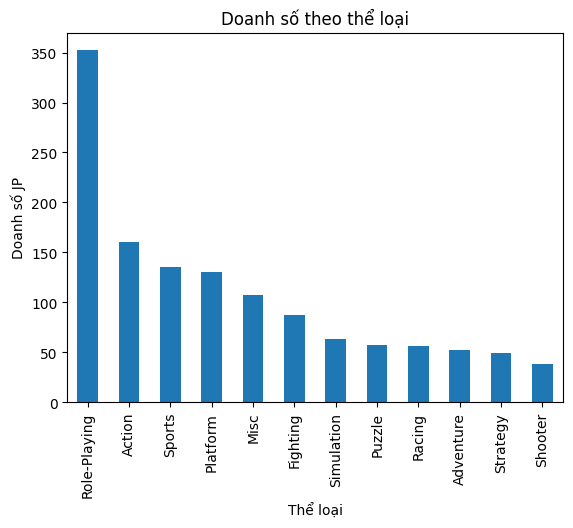

In [69]:
# Doanh số theo thể loại
genre_sales = df.groupby('Genre')['JP_Sales'].sum().sort_values(ascending=False)
genre_sales.plot(kind='bar', title='Doanh số theo thể loại')
plt.xlabel('Thể loại')
plt.ylabel('Doanh số JP')
plt.show()

### Doanh số theo nhà phát hành

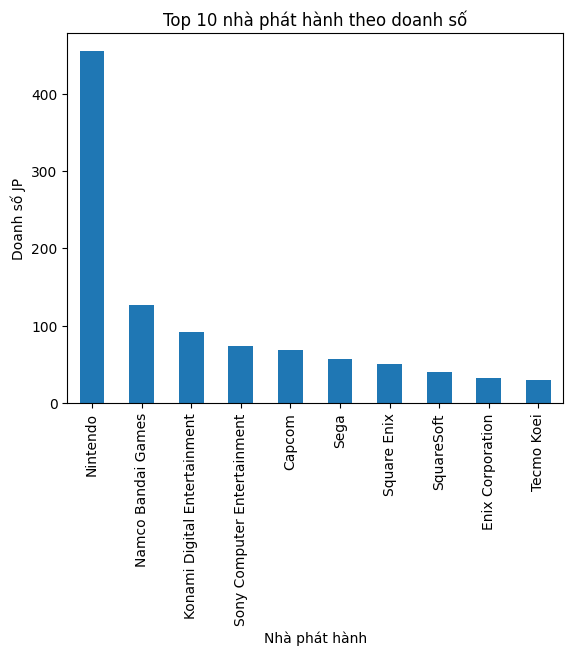

In [70]:
# Top 10 nhà phát hành có doanh số cao nhất
publisher_sales = df.groupby('Publisher')['JP_Sales'].sum().sort_values(ascending=False).head(10)
publisher_sales.plot(kind='bar', title='Top 10 nhà phát hành theo doanh số')
plt.xlabel('Nhà phát hành')
plt.ylabel('Doanh số JP')
plt.show()

### Doanh số theo nhà sản xuất platform

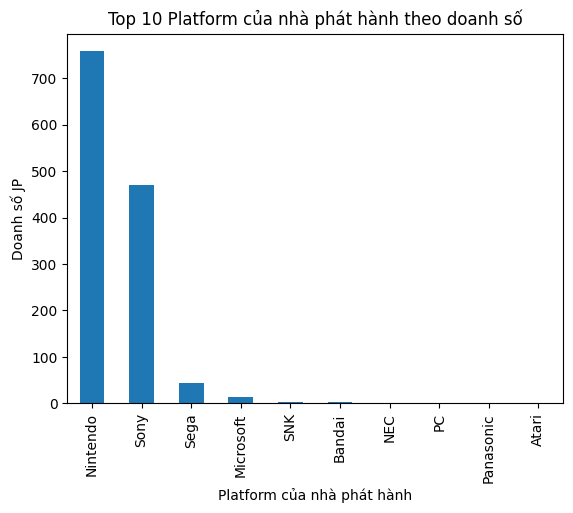

In [71]:
# Top 10 nhà phát hành có doanh số cao nhất
publisher_sales = df.groupby('Manufacturer')['JP_Sales'].sum().sort_values(ascending=False).head(10)
publisher_sales.plot(kind='bar', title='Top 10 Platform của nhà phát hành theo doanh số')
plt.xlabel('Platform của nhà phát hành')
plt.ylabel('Doanh số JP')
plt.show()

Dựa vào top 3 của thể loại, nhà phát hành và platform cho thấy
- Thị trường NA là thích các tựa game thuộc thể loại Role-play, action và Sport
- Các nhà phát hành nổi trội gồm Nintendo, Bandai và Konami
- Platform thuộc các nhà sản xuất Nintendo, Sony và Sega được chú ý nhiều
-> Với thị trường Nhật Bản rất khác biết với các thị trường còn lại khi các thế loại game được yêu thích có chung là action và sport nhưng thể loại role-play lại vượt trội rất nhiều, các nhà sản xuất game và platform nội địa vũng vượt trội so với các công ty đến từ nước khác. Cho thấy thị trường này cần nghiên cứu kỹ về tính nội địa trước khi đầu tư
-> Nếu đầu tư vào thị trường này nên đầu tư game role-play của nhà phát hành và sản xuất flatform Nintendo vì các thông số của công ty này rất vượt trội so với các công ty khác

# Kết luận

Thị trường game rất khắc nghiệt vì phần lớn các game đều có doanh số rất thấp nhưng khi thành công thường có doanh số rất cao. Nên khi đầu từ cần chú ý các yếu tố thị trường khi đầu tư như sau:
* Thị trường NA, EU
  * Thị trường NA và EU đã chiếm tới 76% thị phần toàn ngành game. Đây được xem là 2 thị trường lớn nhất, trong đó thị trường NA chiếm 50% toàn ngành game.
  * Vì tính chất của 2 thị trường này giống nhau đến 90% theo thể loại game, nhà phát hành và platform nên có thể xem như đầu tư vào 2 thị trường cùng lúc.
  * Dựa vào bộ data nên đầu từ vào các thể loại game Action, Sport,Shooter thuộc các nhà phát hành Nintendo, EA, Activision và được chơi trên các hệ máy của Sony, Nintendo và Microsoft.

* Thị trường Others
  * Thị trường này tuy nhỏ hơn 2 thị trường trên nhưng có các thông số về thể loại, nhà phát hành và platform giống với thị trường NA và EU nên về mặt đầu tư có thể đầu tư 3 thị trường NA, EU, Others cùng lúc. Đầu tư các game như đã kết luận ở thị trường NA,EU.
  * Tuy nhiên thị trường này cũng có tính chất bản địa khác so với 2 thị trường NA, EU nên khi muốn đầu tư tập trung vào thị trường này cần chú ý đến các game được chơi trên platforms của Sony vì chỉ số này vượt trội so với Nintendo và Microsoft.

* Thị trường JP
  * Đây là một thị trường rất đặc biệt nặng tính bảng địa. Các chỉ số cho thấy các nhà phát hành và công ty sản xuất platform nội địa rất được ưa chuộng. Cần chú ý đến Nintendo vì công ty này phát hành game hay game chơi trên platform của họ có doanh số vượt trội.
  * Thị trường này cũng thích chơi các thể loại game Action và Shooter như các thị trường khác tuy nhiên thể loại Role-play có doanh số rất vượt trội.
  *Nên đầu tư game thuộc thể loại role-play thuộc nhà phát hành và chơi trên platform của Nintendo sẽ tăng khả năng thành công cao hơn.

